# 공사중

In [0]:
index2name = {
    0: '마카롱',
    1: '티라미수',
    2: '타르트'
}

몇번학습 = 100
학습률 = 1e-5

In [88]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/gdrive', force_remount=True)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [89]:
import os
import cv2
import numpy as np

train_path = './gdrive/My Drive/Colab Notebooks/myai/train (1)/'
test_path = './gdrive/My Drive/Colab Notebooks/myai/test (1)/'
train_files = os.listdir(train_path)
test_files = os.listdir(test_path)

x = [cv2.imread(train_path + file) for file in train_files]
x = [cv2.cvtColor(each, cv2.COLOR_BGR2RGB) / 255 for each in x]
x = np.asarray([cv2.resize(each, (32, 32), interpolation=cv2.INTER_CUBIC) for each in x])

x_test = [cv2.imread(test_path + file) for file in test_files]
x_test = [cv2.cvtColor(each, cv2.COLOR_BGR2RGB) / 255for each in x_test]
x_test = np.asarray([cv2.resize(each, (32, 32), interpolation=cv2.INTER_CUBIC) for each in x_test])

y = [int(file.split('_')[0]) for file in train_files] 
y_test = [int(file.split('_')[0]) for file in test_files] 
num_classes = len(index2name)
eye = np.eye(num_classes)
y = np.asarray([eye[each] for each in y])
y_test = np.asarray([eye[each] for each in y_test])

print('num_classes:', num_classes)
print('x_shape:', x.shape)
print('y_shape:', y.shape)


num_classes: 3
x_shape: (30, 32, 32, 3)
y_shape: (30, 3)


In [25]:
# ls './gdrive/My Drive/Colab Notebooks/myai/'

'test (1)'/  'train (1)'/


In [0]:
# x = [cv2.imread(train_path + file) for file in train_files]
# x_height = np.array([each.shape[0] for each in x])
# x_width = np.array([each.shape[1] for each in x])
# x_min_wh = np.array([min(x_height[i], x_width[i]) for i in range(len(x))])
# p_h_min = x_height//2 - x_min_wh//2
# p_h_max = x_height//2 + x_min_wh//2
# p_w_min = x_width//2 - x_min_wh//2
# p_w_max = x_width//2 + x_min_wh//2
# x = [each[p_h_min[i]:p_h_max[i], p_w_min[i]:p_w_max[i]] / 127.5 - 1 for i, each in enumerate(x)]
# x = np.asarray([cv2.resize(each, (100, 100), interpolation=cv2.INTER_CUBIC) for each in x])

# x_test = [cv2.imread(test_path + file) for file in test_files]
# x_height = np.array([each.shape[0] for each in x_test])
# x_width = np.array([each.shape[1] for each in x_test])
# x_min_wh = np.array([min(x_height[i], x_width[i]) for i in range(len(x_test))])
# p_h_min = x_height//2 - x_min_wh//2
# p_h_max = x_height//2 + x_min_wh//2
# p_w_min = x_width//2 - x_min_wh//2
# p_w_max = x_width//2 + x_min_wh//2
# x_test = [each[p_h_min[i]:p_h_max[i], p_w_min[i]:p_w_max[i]] / 127.5 - 1 for i, each in enumerate(x_test)]
# x_test = np.asarray([cv2.resize(each, (100, 100), interpolation=cv2.INTER_CUBIC) for each in x_test])


In [90]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam, SGD

act = 'tanh'

model = Sequential()
model.add(Conv2D(64, 3, padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(64, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(MaxPool2D())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(MaxPool2D())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(MaxPool2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPool2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation(act))
model.add(Dense(num_classes, activation='softmax'))

adam = Adam(lr=학습률)
model.compile(adam, 'categorical_crossentropy', ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_85 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_85 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_86 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_86 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 64)        0         
__________

In [91]:
history = model.fit(x, y, epochs=몇번학습, validation_split = 0.1)


Train on 27 samples, validate on 3 samples
Epoch 1/100
27/27 [==============================] - 8s 308ms/step - loss: 1.3534 - acc: 0.2963 - val_loss: 0.4324 - val_acc: 1.0000
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.1627 - acc: 1.0000 - val_loss: 0.3125 - val_acc: 1.0000
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0273 - acc: 1.0000 - val_loss: 0.2466 - val_acc: 1.0000
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.2036 - val_acc: 1.0000
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.1740 - val_acc: 1.0000
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.1526 - val_acc: 1.0000
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.1366 - val_acc: 1.0000
Epoch 8/100
27/27 [===================

In [92]:
y_pred = model.predict(x_test)
y_pred2 = np.argmax(y_pred, axis=1)
y_test2 = np.argmax(y_test, axis=1)

y_pred_names = [index2name[y_pred2[i]] for i in range(len(y_pred2))]
y_test_names = [index2name[y_test2[i]] for i in range(len(y_test2))]

count = 0
total = len(y_test_names)
for i, (y_pred_name, y_test_name) in enumerate(zip(y_pred_names, y_test_names)):
  if y_pred_name == y_test_name:
    count += 1
accuracy = count / total * 100

print('정답들:', y_test_names)
print('예측들:', y_pred_names)
print('정확도:', accuracy)


정답들: ['타르트', '타르트', '티라미수', '마카롱', '마카롱', '티라미수']
예측들: ['타르트', '타르트', '티라미수', '타르트', '마카롱', '티라미수']
정확도: 83.33333333333334


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


타르트


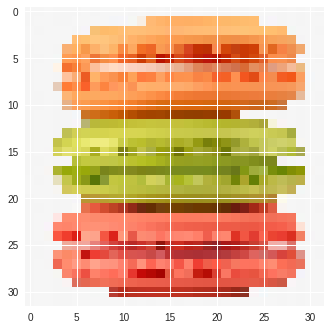

In [94]:
import matplotlib.pyplot as plt

which_file_index = 3
image = x_test
label = y_pred_names

print(label[which_file_index])
plt.imshow(image[which_file_index])
plt.show()
